# Enunciado

**Teoría de Algoritmos II (75.30)**

**1.er Parcialito Domiciliario – 08/04/2022 - Fecha de Entrega: 29/04/2022**

Aclaraciones: Cada ejercicio dice al final del mismo la cantidad de puntos que otorga por hacerse completamente bien (en total, 10). Se deben obtener al menos 5 puntos para aprobar, y se deben aprobar al menos 3 de los parcialitos para aprobar/regularizar la cursada. Para la fecha de entregar, enviar un mail a mbuchwald@fi.uba.ar con un pdf con la resolución, con nombre P1 - PADRON.pdf. Pueden incluir todo el material adicional que les parezca relevante (desde código hasta
gráficos).

Considerando esta red que representa las conexiones de diferentes países por los vuelos (directos) realizados entre ellos, responder las siguientes preguntas. A los fines de estos ejercicios, se puede obviar la última columna del archivo csv.

1. Determinar:

  a. El diámetro de la red.
    
  b. El grado promedio de la red.

  c. El coeficiente de clustering promedio de la red.

  [1 punto]

2. Indicar si existe algún tipo de Homofilia y qué tipo de homofilia es. Si no hay homofilia por ningún criterio, explicar. Justificar detalladamente.

  [3 puntos]

3. Determinar los puentes (globales o locales) en dicha red.

  [1 punto]

4. 
  a. Determinar un tipo de centralidad que podría ser útil calcular para esta red, justificando.

  b. Realizar una representación gráfica de dicha red, considerando la centralidad de los distintos países dada por la métrica del punto a (tamaño de los nodos proporcional a dicha métrica).

  [2 puntos]

5. 
  
  a. Obtener una simulación de un modelado de Erdös-Rényi que corresponda a los parámetros de esta red.
  
  b. Obtener una simulación de un modelado de Preferential Attachment (ley de potencias) que corresponda a los
parámetros de esta red.
  
  c. Obtener una representación de anonymous walks tanto de la red original como para las dos simuladas en los puntos a y b. Determinar por distancia coseno cuál sería la simulación más afín.

  [3 puntos]

# Resolución

In [20]:
# IMPORTS
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import socialnetworksutils.metricas as snu_metrics
import socialnetworksutils.modelos as snu_models

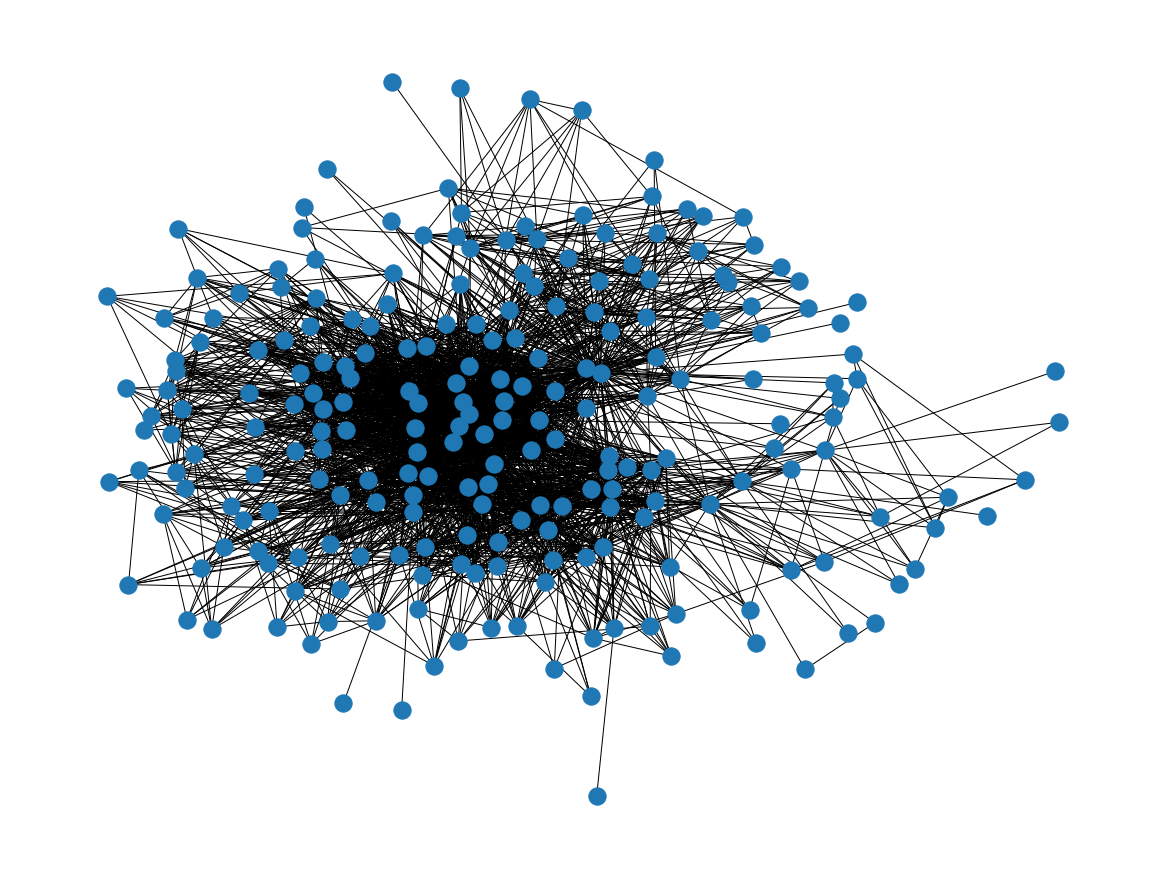

In [17]:
df = pd.read_csv("World.csv")
df = df[['Origen', 'Destino']]

plt.figure(figsize=(16,12))
grafo = nx.from_pandas_edgelist(df, source="Origen", target="Destino")
nx.draw_kamada_kawai(grafo, with_labels=False)

In [3]:
# Algunas estadísticas del dataset
print("Unicos en dataframe: ", len(pd.concat([df['Origen'], df['Destino']]).unique()))
print("Unicos en grafo: ", len(grafo)) # Para verificar, quiero que coincidan
df.describe()

Unicos en dataframe:  229
Unicos en grafo:  229


,Origen,Destino
count,2852,2852
unique,208,220
top,United Kingdom,United States
freq,103,104


## Ejercicio 1

Determinar:

  a. El diámetro de la red.
    
  b. El grado promedio de la red.

  c. El coeficiente de clustering promedio de la red.

In [4]:
diametro = nx.diameter(grafo)
print(f"diametro: {diametro}")

diametro: 5


El diámetro es el largo máximo de todos los caminos mínimos.

El diámetro de este grafo es de 5. Aún teniendo 229 nodos, el diámetro es bastante pequeño, característica que suele estar en redes sociales.

In [5]:
grado_promedio = snu_metrics.grado_promedio(grafo)
print(f"grado_promedio: {grado_promedio}")

grado_promedio: 24.90829694323144


El grado de un vértice es el número de aristas incidentes al vértice.

En este caso, el grado promedio de la red es de 24.9

In [6]:
# SOLUCION 1
N = len(grafo)
clustering_total = 0

for v in grafo:
    clustering_total += snu_metrics.coeficiente_clustering(grafo, v)
    
clustering_promedio = clustering_total / N
print(f"clustering_total: {clustering_total}\nclustering_promedio: {clustering_promedio}")

clustering_total: 151.17584687818797
clustering_promedio: 0.6601565365859736


In [7]:
# SOLUCION 2
N = len(grafo)
clustering_total = 0

for ci in nx.clustering(grafo).values():
    clustering_total += ci
    
clustering_promedio = clustering_total / N
print(f"clustering_total: {clustering_total}\nclustering_promedio: {clustering_promedio}")

clustering_total: 151.17584687818797
clustering_promedio: 0.6601565365859736


In [8]:
# SOLUCION 3
nx.average_clustering(grafo)

0.6601565365859736

Dado un vértice A, el coeficiente de clustering es la probabilidad de que dos vértices adyacentes de A sean adyacentes entre sí. Este valor mide la proporción de los vecinos de A que están conectados.

$$
C_i = \frac{2e_i}{k_i(k_i-1)}
$$

$$
C = \frac{1}{N}\sum_i C_i
$$

Con $e_i$ la cantidad de aristas que unen vecinos de $i$. Si el grafo es dirigido no va el 2, y se cuentan ambas apariciones por separado.

En general, el coeficiente de clustering promedio de una red social suele ser alto.

En este caso, el grafo es no dirigido y el coeficiente de clustering promedio de la red es de 0.66, el cual es un valor alto.

## Ejercicio 2

Indicar si existe algún tipo de Homofilia y qué tipo de homofilia es. Si no hay homofilia por ningún criterio, explicar. Justificar detalladamente.

POSIBLS ANALISIS: LETRA COMIENZO, PODERIO ECONOMICO, CONTINENTE, RELIGION

3. Determinar los puentes (globales o locales) en dicha red.

In [9]:
# Puentes locales
puentes_locales = list(nx.local_bridges(grafo))
print(f"Cantidad de puentes locales: {len(puentes_locales)}\n")

for v1, v2, s in puentes_locales:
    print(f"{v1} - {v2}. Longitud camino mínimo: {s}")

Cantidad de puentes locales: 11

Papua New Guinea - Micronesia. Longitud camino mínimo: 3
Fiji - Tuvalu. Longitud camino mínimo: inf
Micronesia - Marshall Islands. Longitud camino mínimo: 3
United States - American Samoa. Longitud camino mínimo: inf
United Kingdom - Saint Helena. Longitud camino mínimo: inf
Canada - Saint Pierre and Miquelon. Longitud camino mínimo: inf
Antigua and Barbuda - Montserrat. Longitud camino mínimo: inf
New Zealand - Niue. Longitud camino mínimo: inf
South Africa - Lesotho. Longitud camino mínimo: inf
South Africa - Swaziland. Longitud camino mínimo: inf
Burma - Myanmar. Longitud camino mínimo: inf


In [10]:
# Puentes globales
puentes_globales = list(nx.bridges(grafo))
print(f"Cantidad de puentes globales: {len(puentes_globales)}\n")

for v1, v2 in puentes_globales:
    print(f"{v1} - {v2}")

Cantidad de puentes globales: 9

Fiji - Tuvalu
United States - American Samoa
United Kingdom - Saint Helena
Canada - Saint Pierre and Miquelon
Antigua and Barbuda - Montserrat
New Zealand - Niue
South Africa - Lesotho
South Africa - Swaziland
Burma - Myanmar


Un puente es una arista sin la cual el grafo no es conexo.

Un puente local es una arista que une dos vértices sin adyacentes en común.

Aprovechando networkx, podemos ver cuánto es la longitud del camino mínimo que une a los vértices que eran unidos por dicho puente local. En el caso de ser un puente global, el valor de la longitud es infinito, ya que no hay manera de conectar dichos nodos.

Los puentes locales son:

- Papua New Guinea - Micronesia, con una longitud de 3
- Micronesia, Marshall Islands, con una longitud de 3

Además, existen 9 puentes globales (que también son locales)

- Fiji, Tuvalu
- United States, American Samoa
- United Kingdom, Saint Helena
- Canada, Saint Pierre and Miquelon
- Antigua and Barbuda, Montserrat
- New Zealand, Niue
- South Africa, Lesotho
- South Africa, Swaziland
- Burma, Myanmar

4. 
  a. Determinar un tipo de centralidad que podría ser útil calcular para esta red, justificando.

  b. Realizar una representación gráfica de dicha red, considerando la centralidad de los distintos países dada por la métrica del punto a (tamaño de los nodos proporcional a dicha métrica).

In [11]:
sorted([(x, nx.degree_centrality(grafo)[x]) for x in nx.degree_centrality(grafo)], key=lambda x: -x[1])

[('France', 0.5614035087719298),
 ('Turkey', 0.5087719298245614),
 ('United Kingdom', 0.4956140350877193),
 ('United States', 0.4649122807017544),
 ('Germany', 0.4649122807017544),
 ('United Arab Emirates', 0.44298245614035087),
 ('Netherlands', 0.40789473684210525),
 ('Spain', 0.39035087719298245),
 ('Belgium', 0.381578947368421),
 ('Qatar', 0.381578947368421),
 ('Italy', 0.37280701754385964),
 ('Russia', 0.3421052631578947),
 ('China', 0.3289473684210526),
 ('Switzerland', 0.32456140350877194),
 ('Canada', 0.3157894736842105),
 ('Ethiopia', 0.3070175438596491),
 ('Austria', 0.293859649122807),
 ('Egypt', 0.2850877192982456),
 ('India', 0.2763157894736842),
 ('Morocco', 0.27192982456140347),
 ('Poland', 0.2587719298245614),
 ('Thailand', 0.2543859649122807),
 ('Denmark', 0.24561403508771928),
 ('South Korea', 0.24122807017543857),
 ('Saudi Arabia', 0.24122807017543857),
 ('Greece', 0.2324561403508772),
 ('Kenya', 0.22368421052631576),
 ('Hong Kong', 0.21929824561403508),
 ('Czech Repu

In [12]:
sorted([(x, nx.eigenvector_centrality(grafo)[x]) for x in nx.degree_centrality(grafo)], key=lambda x: -x[1])

[('France', 0.19018754154739337),
 ('Turkey', 0.18739020600860878),
 ('United Kingdom', 0.18446344358180516),
 ('Germany', 0.18198060358598672),
 ('United Arab Emirates', 0.17288688625708143),
 ('Italy', 0.16619628005028209),
 ('Netherlands', 0.1657755232139752),
 ('Qatar', 0.15967493902671367),
 ('Belgium', 0.15782891658543186),
 ('Spain', 0.15692534474244815),
 ('Russia', 0.15387191683377613),
 ('Switzerland', 0.15140957305083133),
 ('United States', 0.1463194563964211),
 ('Austria', 0.14433313710033255),
 ('China', 0.13459600003712485),
 ('Egypt', 0.13267624038977413),
 ('Poland', 0.13157955813416017),
 ('Denmark', 0.1268935459595689),
 ('Greece', 0.12394252366249905),
 ('India', 0.12208649928735534),
 ('Czech Republic', 0.117810609571224),
 ('Ukraine', 0.11734952389115313),
 ('Canada', 0.11707243293153669),
 ('Sweden', 0.11590468350730095),
 ('Hungary', 0.1149283920638984),
 ('Israel', 0.11313282591489113),
 ('Finland', 0.11199711830477334),
 ('Thailand', 0.10919806491354682),
 ('S

In [13]:
sorted([(x, nx.betweenness_centrality(grafo)[x]) for x in nx.degree_centrality(grafo)], key=lambda x: -x[1])


[('United States', 0.15312826033467095),
 ('France', 0.1066582564383836),
 ('United Kingdom', 0.07949572806991673),
 ('Australia', 0.05396712680185675),
 ('Turkey', 0.05290943296892291),
 ('United Arab Emirates', 0.04606573709425318),
 ('Canada', 0.04502321245880298),
 ('Spain', 0.03799772341776959),
 ('Germany', 0.03793083275314773),
 ('Ethiopia', 0.03421749836748116),
 ('Netherlands', 0.03277211291345285),
 ('South Africa', 0.03151538021435897),
 ('Qatar', 0.029936904969256453),
 ('China', 0.029591274905900435),
 ('Belgium', 0.0255336820467668),
 ('Fiji', 0.021141378015370412),
 ('New Zealand', 0.020930265517386176),
 ('Japan', 0.020035132237902948),
 ('Morocco', 0.019488586960111944),
 ('Kenya', 0.01910698378280396),
 ('South Korea', 0.018644776801229196),
 ('Antigua and Barbuda', 0.015251026558795254),
 ('Russia', 0.015088533456477048),
 ('Thailand', 0.013801933432257663),
 ('India', 0.013784016408036195),
 ('Singapore', 0.013502839615083348),
 ('Hong Kong', 0.012754248578738416),


5. 
  
  a. Obtener una simulación de un modelado de Erdös-Rényi que corresponda a los parámetros de esta red.
  
  b. Obtener una simulación de un modelado de Preferential Attachment (ley de potencias) que corresponda a los
parámetros de esta red.
  
  c. Obtener una representación de anonymous walks tanto de la red original como para las dos simuladas en los puntos a y b. Determinar por distancia coseno cuál sería la simulación más afín.

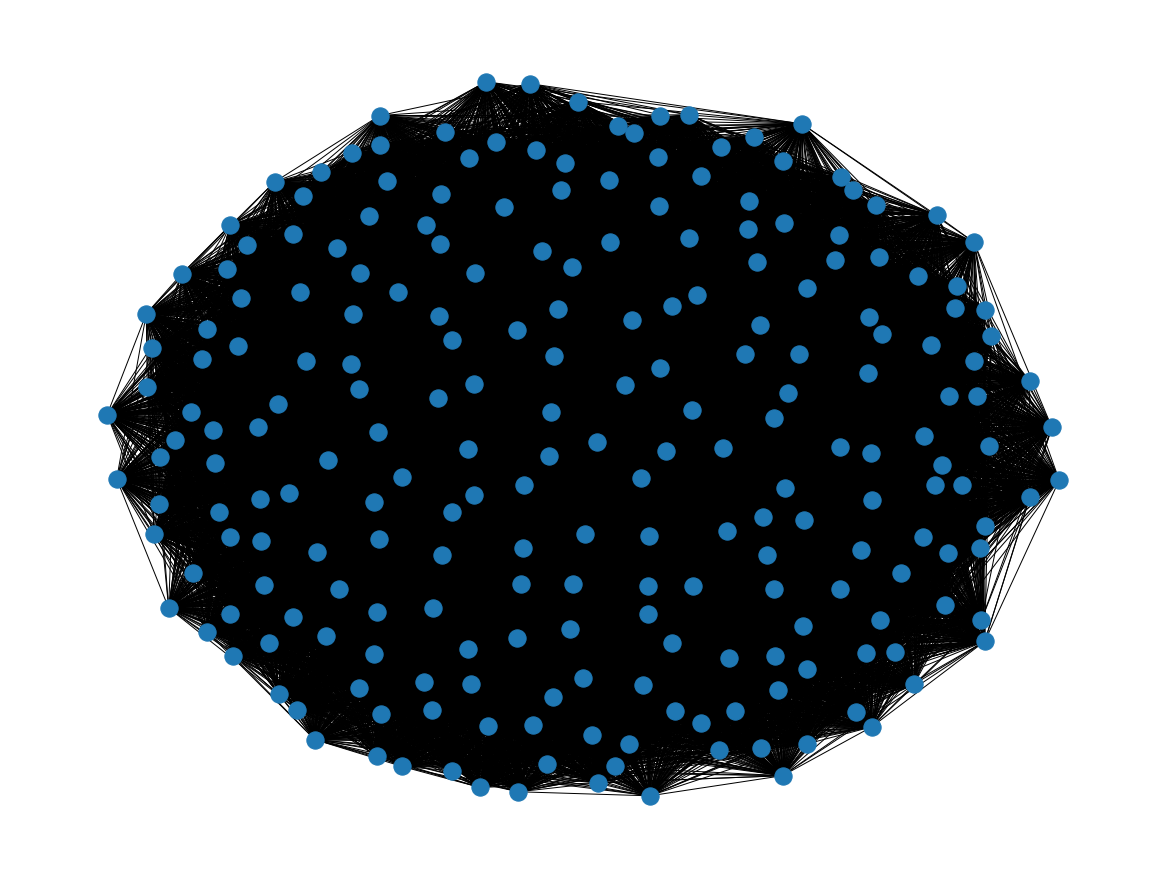

In [18]:
n = 229
p = 0.66
seed = 20160

plt.figure(figsize=(16,12))
erdos_renyi = nx.erdos_renyi_graph(n, p, seed=seed)
nx.draw_kamada_kawai(erdos_renyi, with_labels=False)

In [19]:
# Análisis Erdos Renyi

diametro = nx.diameter(erdos_renyi)
print(f"diametro: {diametro}")
grado_promedio = snu_metrics.grado_promedio(erdos_renyi)
print(f"grado_promedio: {grado_promedio}")
clutering_promedio = nx.average_clustering(erdos_renyi)
print(f"clutering_promedio: {clutering_promedio}")

diametro: 2
grado_promedio: 149.10917030567686
clutering_promedio: 0.6537426005837838


In [ ]:
# Erdos Renyi 2

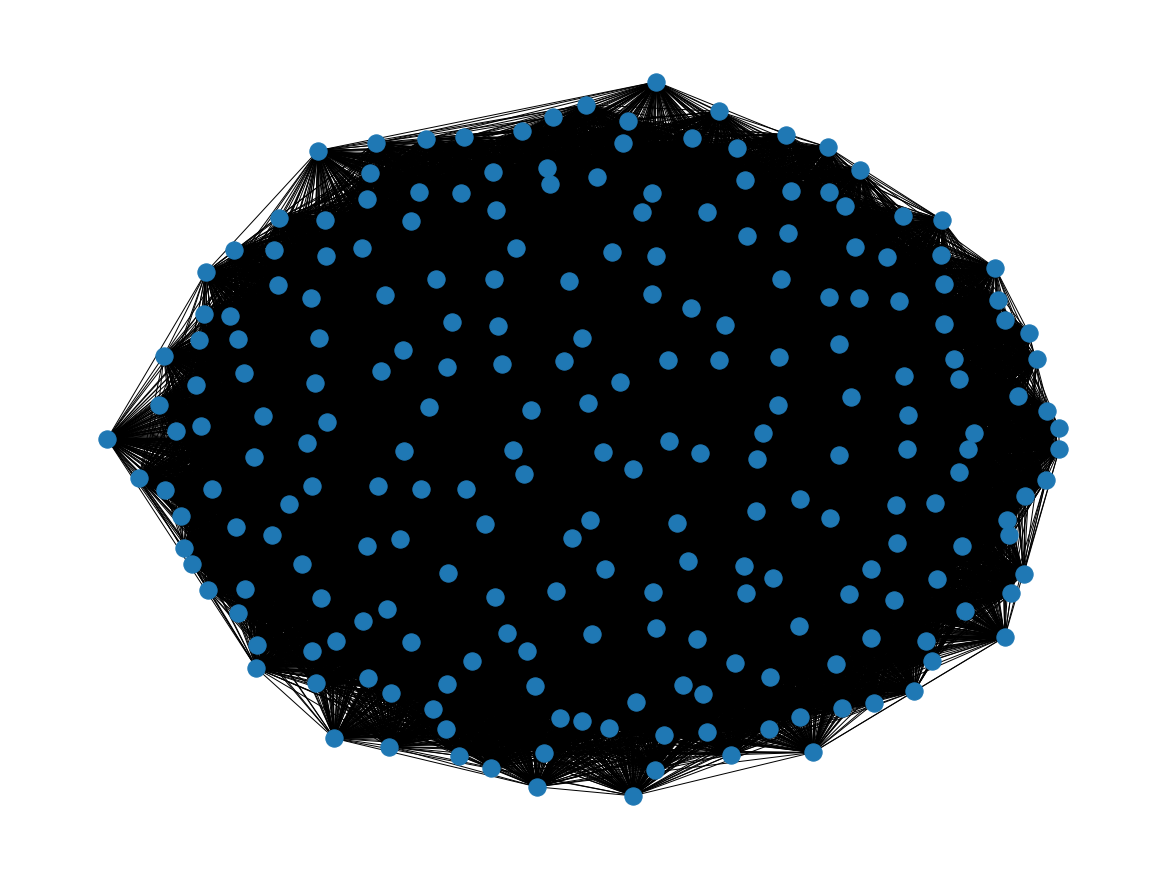

In [22]:
n = 229
k = 229 * 0.66 # C * N
seed = 20160

plt.figure(figsize=(16,12))
erdos_renyi = snu_models.erdos_renyi(n,k)
nx.draw_kamada_kawai(erdos_renyi, with_labels=False)

In [23]:
# Análisis Erdos Renyi 2

diametro = nx.diameter(erdos_renyi)
print(f"diametro: {diametro}")
grado_promedio = snu_metrics.grado_promedio(erdos_renyi)
print(f"grado_promedio: {grado_promedio}")
clutering_promedio = nx.average_clustering(erdos_renyi)
print(f"clutering_promedio: {clutering_promedio}")

diametro: 2
grado_promedio: 152.06113537117903
clutering_promedio: 0.6678730255038532


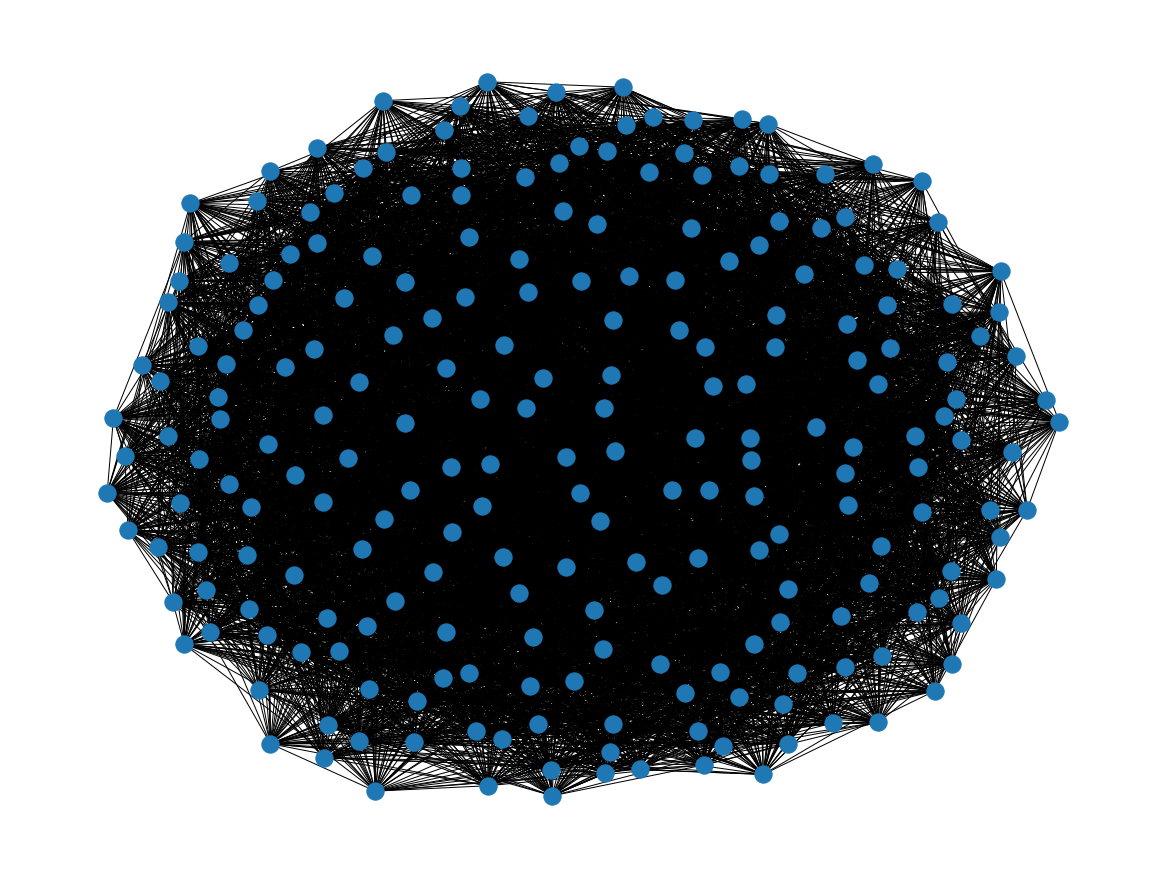

In [31]:
n = 229
a = 2.5
k = 25

plt.figure(figsize=(16,12))
preferential_attachment = snu_models.preferential_attachment(False, a, n, k)
nx.draw_kamada_kawai(preferential_attachment, with_labels=False)

In [32]:
# Análisis preferential attachment

diametro = nx.diameter(preferential_attachment)
print(f"diametro: {diametro}")
grado_promedio = snu_metrics.grado_promedio(preferential_attachment)
print(f"grado_promedio: {grado_promedio}")
clutering_promedio = nx.average_clustering(preferential_attachment)
print(f"clutering_promedio: {clutering_promedio}")

diametro: 2
grado_promedio: 58.10480349344978
clutering_promedio: 0.25422286463371735


In [15]:
#!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
#from colab_pdf import colab_pdf
#colab_pdf('P1_TDA2.ipynb')